In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

# Calculate duration on the navigation

In [3]:
#number = 4
tmp_time = []
Total_tray_time = []
with open ('GBB001_(003151)/Logs/201503231059-log.txt', 'r') as filee: #split de data
    for line in filee:
        time = line.split(' ')[1].split(';')[0].split(':') 
        tmp_time.append (time) # list with all the hours
       
       
prev_time = tmp_time [0] # the first hour
prev_time_seconds = int (prev_time [0]) * 3600 + int (prev_time [1])*60 + int (prev_time [2]) # convert to seconds

actual_time = tmp_time[len(tmp_time)-1] # the last hour
actual_time_seconds = int(actual_time [0])* 3600 + int(actual_time [1])* 60 + int(actual_time [2])

tmp_tray_time =  actual_time_seconds - prev_time_seconds # the total time spend during the navigation  
tray_time_h = (tmp_tray_time/3600) # calculate de hours
aux = tmp_tray_time % 3600 # calculate de rest of the hours
tray_time_m = (aux/60) # calculate the minutes
tray_time_s = aux%60 # calculate de seconds
    
#tray_time_s = tray_time_m
Total_tray_time = tray_time_h, tray_time_m, tray_time_s    
print 'Trayectory time = ' , tray_time_h,':', tray_time_m,':',tray_time_s     

Trayectory time =  1 : 24 : 17


In [17]:
#number = 4
with open ('GBB001_(003151)/Logs/201503231059-log.txt', 'r') as filee: 
    for line in filee:
        words = line.split(' ')
    
        prev_hour =  int(words[1][0:2])
        prev_min =  int(words[1][3:5])
        prev_day = int (words[0][3:5])
        
        print 'First day: ', prev_day
        print 'First hour: ', prev_hour
        print 'First minute: ', prev_min
        break

First day:  23
First hour:  10
First minute:  59


In [26]:
counter = 0
total_data = []
tmp_data = []
with open ('GBB001_(003151)/Logs/201503231059-log.txt', 'r') as filee:
    for line in filee:
        words = line.split(' ')
        actual_min =  int(words[1][3:5])
        
        if actual_min != 59 and abs(prev_min-actual_min)<=1:
            tmp_data.append(line)
            
        elif actual_min==0 and prev_min ==59:
            tmp_data.append(line)
    
        #elif  actual_day != 30 and abs(prev_min-actual_min)<1:
            #tmp_data.append(line)    
            
        #elif  actual_min != 59 and abs(prev_min-actual_min)<=4:
            #tmp_data.append(line)
            
        else:
            if len(tmp_data)>0:
                total_data.append( tmp_data )
                print counter
            tmp_data = []
            
        prev_min =  int(words[1][3:5])
        counter+=1
    
            

29882


# Represent the trajectory with the 3D points

29816


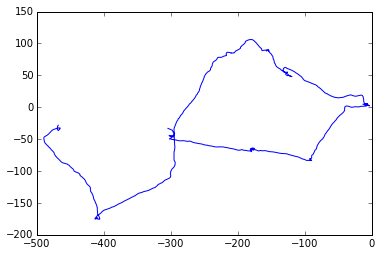

In [27]:
counter = 0
count_xx = 0
sssppp = 1
for trial in range(len(total_data)):

    xx,yy = [],[]

    for ii in range(len( total_data[trial]  )):
        if total_data[trial][ii][-2] == ')':
            tmp_xx = total_data[trial][ii].split('3D')[1][1:].split(',')[0]
            tmp_yy = total_data[trial][ii].split('3D')[1][1:].split(',')[1].split(')')[0]

            xx.append(tmp_xx)
            yy.append(tmp_yy)
            
    count_xx += len(xx)

#     plt.subplot(3,1,sssppp)
    plt.plot(xx,yy)
    sssppp += 1
    
print count_xx

# Represent the trajectory with the GPS points

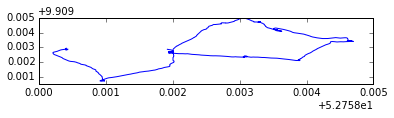

In [28]:
#os.mkdir( 'TrayectoryAll')
sssppp = 1
tt1=[]
for trial in range(len(total_data)):

    xx,yy = [],[]

    if len( total_data[trial]) > 0:
        for ii in range(len( total_data[trial]  )):
            if total_data[trial][ii][-2] == ')':
                
                ttt11 = total_data[trial][ii].split(';')[2][4:-1].split(',')
                xx.append(ttt11[0])
                yy.append(ttt11[1])
                prev_xx = float(ttt11[0])
                prev_yy = float(ttt11[1])
                for ppp in ttt11:
                    actual_xx = float(ttt11[0])
                    actual_yy = float(ttt11[1])
                    a = abs(prev_xx - actual_xx)
                    #print 'abs: ', a
                    
                    break
                    #print 'Postpost: ',prev_xx
                   
                    #if abs( prev_xx - actual_xx) and abs(prev_yy - actual_yy)!= 0.0:
                        
                    
      
        plt.subplot(3,1,sssppp)
        plt.plot(xx,yy)
        sssppp += 1
